<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20230422.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [2]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta 
import os
import re
from functools import reduce
from collections import defaultdict
from scipy import stats
from scipy.stats import norm

# Customer Analysis

In [3]:
os.listdir()

['.config',
 'mall_customers.csv',
 'sales_vs_discount.csv',
 'app_wau.csv',
 'online_retail_II.xlsx',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'bz_data_analyis.csv',
 'ecommerce-data.csv',
 'test.csv',
 'sample-sales-data.csv',
 'lead_conversion.csv',
 'match_result_test.csv',
 '1_orders_dataset.csv',
 'scanner_data.csv',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'groceries.csv',
 'cookie_cats.csv',
 'sales.csv',
 '1_customers_dataset.csv',
 '1_order_payments_dataset.csv',
 'mock_sales_data.csv',
 'ab_experiment.csv',
 'sales_data_with_stores.csv',
 'online_retail.xlsx',
 'sample_data']

In [5]:
df = pd.read_csv('1_order_payments_dataset.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [7]:
df[['payment_sequential', 'payment_type']].value_counts().reset_index()

,payment_sequential,payment_type,0
0,1,credit_card,76476
1,1,boleto,19783
2,2,voucher,2669
3,1,voucher,1621
4,1,debit_card,1477
5,3,voucher,579
6,2,credit_card,318
7,4,voucher,278
8,5,voucher,170
9,6,voucher,118


In [11]:
df[['payment_type',	'payment_installments']].value_counts().reset_index()

,payment_type,payment_installments,0
0,credit_card,1,25455
1,boleto,1,19784
2,credit_card,2,12413
3,credit_card,3,10461
4,credit_card,4,7098
5,voucher,1,5775
6,credit_card,10,5328
7,credit_card,5,5239
8,credit_card,8,4268
9,credit_card,6,3920


In [25]:
corrs = [eval(f"df[df['payment_type'] == '{a}'][['payment_installments', 'payment_value']].corr()") for a in df['payment_type'].unique()]
corrs

[                      payment_installments  payment_value
 payment_installments              1.000000       0.376498
 payment_value                     0.376498       1.000000,
                       payment_installments  payment_value
 payment_installments                   NaN            NaN
 payment_value                          NaN            1.0,
                       payment_installments  payment_value
 payment_installments                   NaN            NaN
 payment_value                          NaN            1.0,
                       payment_installments  payment_value
 payment_installments                   NaN            NaN
 payment_value                          NaN            1.0,
                       payment_installments  payment_value
 payment_installments                   NaN            NaN
 payment_value                          NaN            NaN]

In [26]:
def get_heatmap(obj) : 
  sns.heatmap(obj, annot = True)
  plt.show()

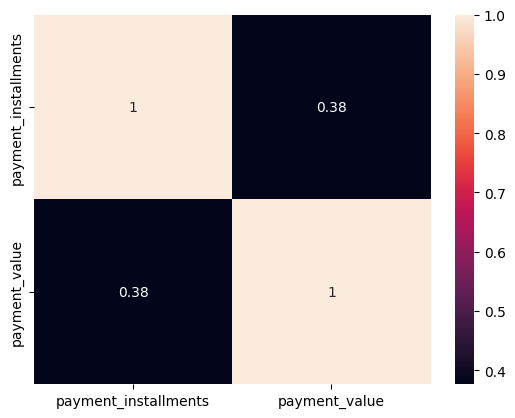

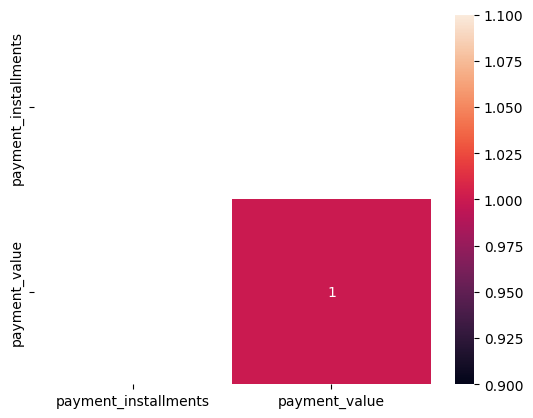

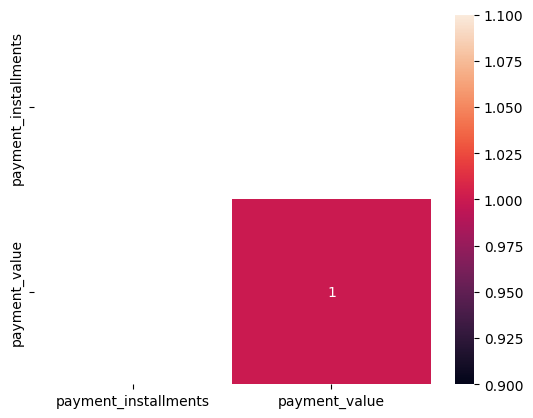

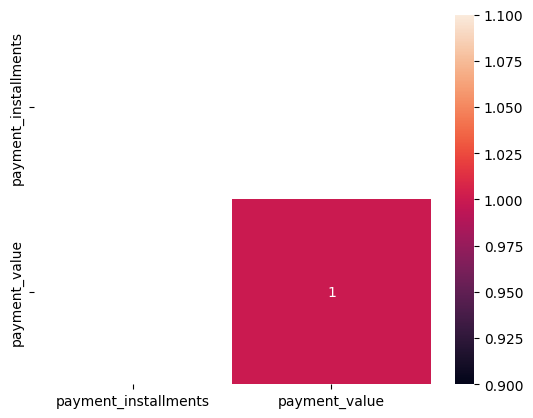

/usr/local/lib/python3.9/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
/usr/local/lib/python3.9/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered


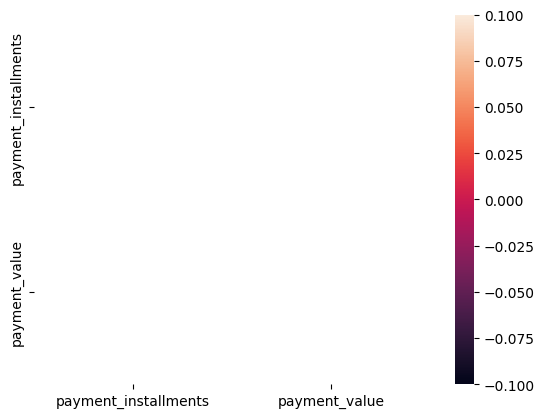

In [30]:
for corr in corrs : 
  sns.heatmap(corr, annot = True)
  plt.show()

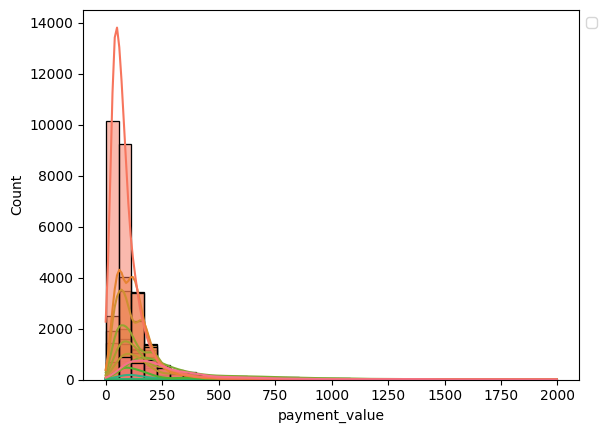

In [35]:
sns.histplot(data = df[(df['payment_type'] == 'credit_card') & (df['payment_value'] <= 2000)].assign(payment_installments = df['payment_installments'].astype(str)), 
             x = 'payment_value', 
             hue = 'payment_installments', 
             kde = True, bins = 35)
plt.legend(bbox_to_anchor = [1.05, 1], ncol = 2)
plt.show()

In [41]:
df['payment_installments'] = pd.Categorical(df['payment_installments'], categories = df['payment_installments'].sort_values().unique())

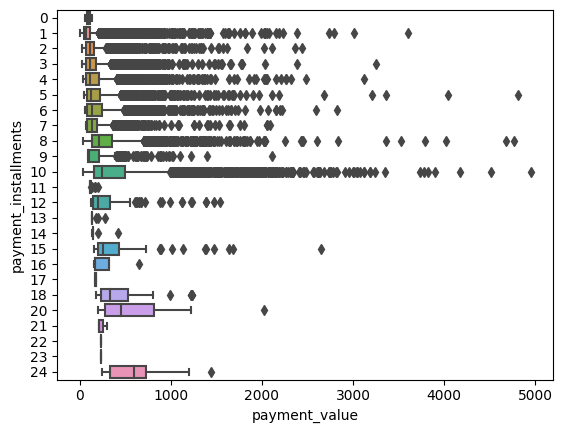

In [47]:
sns.boxplot(data = df[(df['payment_type'] == 'credit_card') & (df['payment_value'] <= 6000)], 
             x = 'payment_value', 
             y = 'payment_installments')
plt.show()

# Iterators

In [48]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [50]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in users[0].keys()}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}

In [52]:
{k : [user[k] for user in users] for k in users[0].keys()}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}